In [3]:
import pandas as pd
import numpy as np
import sympy as sp
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.optimize import differential_evolution
import warnings
warnings.filterwarnings('ignore')

In [4]:
def categorizar(df):
    
    df['classe_bonus_bin'] = df['classe_bonus'].apply(lambda x: '00'  if x == 0 else 'Demais')   
    
    df['MD_sexo_bin'] = df['MD_sexo'].map({'Masculino': 'Masculino', 
                                 'Feminino': 'Feminino', 
                                  'ERRO': 'Masculino'}).astype(object)
    
    df['MD_sexo_2bin'] = df['MD_sexo'].map({'Masculino': 1, 
                                 'Feminino': 0, 
                                  'ERRO': 1}).astype(object)


    df['fx_ir_12m_bin'] = df['fx_ir_12m'].apply(lambda x: '01_00_20' if x == '01 - 00-<=020' else
                                                          '02_20_40' if x == '02 - 20-<=040' else
                                                          '03_40_60' if x == '03 - 40-<=060' else
                                                          '04_60_80' if x == '04 - 60-<=080' else
                                                          '05_80_100' if x == '05 - 80-<=100' else
                                                          '02_20_40' if x == 'NI'           else 'ERROR')

  
    df['MD_comb_bin'] = df['MD_comb'].apply(lambda x: 'Gasolina' if x == 'Gasolina'  else 'Demais')

    df['canal_bin'] =  df['canal'].apply(lambda x: 'Corretor_Mais' if x == 'Corretor Mais' else 
                                                   'Corretor_Mais' if x == 'CorretorMais'
                                                                   else    'Demais')
   
    df['per_com_bin'] = df['per_com'].apply(lambda x: 'p_1_10' if x < 10 else
                                                      'p_10_35' if x >= 10 else 'ERROR')    



    df['idade_ult_RNS_bin'] = df['idade_ult_RNS'].apply(lambda x:     'Sem_Sinistro' if x == 'Sem Sinistro' else
                                                                      '01_05_anos' if x == '01 ano' else
                                                                      '01_05_anos' if x == '02 anos' else
                                                                      '01_05_anos' if x == '03 anos' else
                                                                      '01_05_anos' if x == '04 anos' else
                                                                      '01_05_anos' if x == '05 anos' else '06_inf')


    df['UF_bin'] = df['UF'].apply(lambda x:     'AL_CE_RS'  if x == 'AL' else
                                                'AL_CE_RS'  if x == 'CE' else
                                                'AL_CE_RS'  if x == 'RS' else 
                                                'AP_DF_ES_PA_PB_RN_SC' if x == 'AP' else 
                                                'AP_DF_ES_PA_PB_RN_SC' if x == 'DF' else 
                                                'AP_DF_ES_PA_PB_RN_SC' if x == 'ES' else 
                                                'AP_DF_ES_PA_PB_RN_SC' if x == 'PA' else 
                                                'AP_DF_ES_PA_PB_RN_SC' if x == 'PB' else 
                                                'AP_DF_ES_PA_PB_RN_SC' if x == 'RN' else 
                                                'AP_DF_ES_PA_PB_RN_SC' if x == 'SC' else 
                                                'GO_MA_MG'             if x == 'GO' else 
                                                'GO_MA_MG'             if x == 'MA' else 
                                                'GO_MA_MG'             if x == 'MG' else 
                                                'MT_PR'                if x == 'MT' else
                                                'MT_PR'                if x == 'PR' else 
                                                'RJ'                   if x == 'RJ' else  
                                                'Demais')

    df['md_tipo_renov_ant_bin'] = df['Renovacao_ant'].apply(lambda x:     '1_SeguroNovo'       if x == '1 - Seguro Novo'  else
                                                                          '2_RenovPropria'     if x == '2 - Renov MAPFRE sem sinistro'   else
                                                                          '2_RenovPropria'     if x == '3 - Renov MAPFRE com sinistro'   else
                                                                          '3_RenovCongenere'   if x == '4 - Renov Congenere sem sinistro' else
                                                                          '3_RenovCongenere'   if x == '5 - Renov Congenere com sinistro' else
                                                                          '3_RenovCongenere'   if x == '6 - Renov BB sem sinistro' else
                                                                          '3_RenovCongenere'   if x == '7 - Renov BB com sinistro' else  
                                                                          '2_RenovPropria')
  
    df['MD_tipo_renov_bin'] = df['MD_tipo_renov'].apply(lambda x:          '2_RenovPropria_sem_sin'     if x == '2 - Renov MAPFRE sem sinistro'   else
                                                                           '3_RenovPropria_com_sin'     if x == '3 - Renov MAPFRE com sinistro'   else
                                                                           'Error')
   
     
    df['Cod_End_bin'] = df['Cod_End'].apply(lambda x: '13509'  if x == 13509 else
                                                      '13509'  if x == 50007 else
                                                      '13509'  if x == 50100 else 'Demais')   

    df['MD_capac_bin'] = df['MD_capac'].apply(lambda x: '5'  if x == 5  else 'Demais')  



    df['fator_ajuste_bin'] = df['MD_fator_ajuste'].apply(lambda x: 'f_80_101'    if x < 101 else
                                                                   'f_101_120'   if x >= 101  else 
                                                                   'f_80_101')   
    
    return df

In [5]:
def demand_model(df):

    def demanda(P,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26):
        D=np.exp(1.792602-0.241324*np.log(P)+0.723241*np.divide(P, X1)-1.042202*np.log(np.divide(P, X2))-0.542088*np.log(np.divide(P, X3))-1.241707*np.log((np.divide(P, X4)))+0.279957*np.log(X5 + 1)+0.011005*X6+0.217811*X7-0.051313*X8-0.135894*X9+0.298834*X10-0.326222*X11-0.222516*X12-0.173146*X13+0.012212*X14-0.131043*X15+0.240445*X16+0.271751*X17-0.355534*X18+0.050358*X19-2.443928*X20-0.696049*X21+0.859159*X22+2.293601*X23-0.025709*X24-1.023493*X25-0.796933*X26)
        return D/(1+D)
  
    return  demanda(df['premio'], df['is_casco_ofer'], df['GBM_mercado'], df['Premio_IC_100'], df['premio_anterior'], df['MD_tempo_casa_2'], df['per_com'], df['per_com_bin_p_1_10'], df['canal_bin_Corretor_Mais'], df['Cod_End_bin_13509'], df['fator_ajuste_bin_f_101_120'], df['classe_bonus_bin_00'], df['UF_bin_AL_CE_RS'], df['UF_bin_AP_DF_ES_PA_PB_RN_SC'], df['UF_bin_GO_MA_MG'], df['UF_bin_MT_PR'], df['UF_bin_RJ'], df['MD_comb_bin_Gasolina'], df['md_tipo_renov_ant_bin_1_SeguroNovo'], df['md_tipo_renov_ant_bin_3_RenovCongenere'], df['fx_ir_12m_bin_01_00_20'], df['fx_ir_12m_bin_02_20_40'], df['fx_ir_12m_bin_04_60_80'], df['fx_ir_12m_bin_05_80_100'], df['MD_tipo_renov_bin_3_RenovPropria_com_sin'], df['idade_ult_RNS_bin_01_05_anos'], df['idade_ult_RNS_bin_06_inf'])

In [17]:
def elasticidade(df):
    
    df['tarifa']=df['premio']
    df['numbers'] = df['premio']/df['tarifa']
    if df['numbers'].any()>1 :
        df['X27'] = df['numbers']-1
    else:
         df['X27']=1
    
    P=(df['premio'])
    X1=np.array(df['is_casco_ofer'])
    X2=np.array(df['GBM_mercado'])
    X3=np.array(df['Premio_IC_100'])
    X4=np.array(df['premio_anterior'])
    X5=np.array(df['MD_tempo_casa_2'])
    X6=np.array(df['per_com'])
    X7=np.array(df['per_com_bin_p_1_10'])
    X8=np.array(df['canal_bin_Corretor_Mais'])
    X9=np.array(df['Cod_End_bin_13509'])
    X10=np.array(df['fator_ajuste_bin_f_101_120'])
    X11=np.array(df['classe_bonus_bin_00'])
    X12=np.array(df['UF_bin_AL_CE_RS'])
    X13=np.array(df['UF_bin_AP_DF_ES_PA_PB_RN_SC'])
    X14=np.array(df['UF_bin_GO_MA_MG'])
    X15=np.array(df['UF_bin_MT_PR'])
    X16=np.array(df['UF_bin_RJ'])
    X17=np.array(df['MD_comb_bin_Gasolina'])
    X18=np.array(df['md_tipo_renov_ant_bin_1_SeguroNovo'])
    X19=np.array(df['md_tipo_renov_ant_bin_3_RenovCongenere'])
    X20=np.array(df['fx_ir_12m_bin_01_00_20'])
    X21=np.array(df['fx_ir_12m_bin_02_20_40'])
    X22=np.array(df['fx_ir_12m_bin_04_60_80'])
    X23=np.array(df['fx_ir_12m_bin_05_80_100'])
    X24=np.array(df['MD_tipo_renov_bin_3_RenovPropria_com_sin'])
    X25=np.array(df['idade_ult_RNS_bin_01_05_anos'])
    X26=np.array(df['idade_ult_RNS_bin_06_inf'])
    X27=np.array(df['X27'])

    
    
    
    # Definindo as variáveis simbólicas
    P, X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X12, X13, X14, X15, X16, X17, X18, X19, X20, X21, X22, X23, X24, X25, X26, X27 = sp.symbols('P X1 X2 X3 X4 X5 X6 X7 X8 X9 X10 X11 X12 X13 X14 X15 X16 X17 X18 X19 X20 X21 X22 X23 X24 X25 X26 X27')

    # Definindo a função de demanda
    #demanda_v1 = sp.exp(1.3356- 0.2576 * sp.log(P)+ 1.3647 * (P / X1)- 0.8782 * sp.log(P / X2)- 0.795  * sp.log(P / X3)- 1.6731 * sp.log(P / X4)+ 0.3797 * sp.log(X5 + 1)+ 0.0011 * X6+ 0.1253 * X7+ 0.1334 * X8- 0.1382 * X9+ 0.3919 * X10- 0.1397 * X11- 0.2305 * X12- 0.2832 * X13+ 0.0024 * X14- 0.1476 * X15+ 0.2817 * X16+ 0.3336 * X17- 0.4115 * X18+ 0.0127 * X19- 0.73 * X20+ 0.4343 * X21+ 1.1066 * X22+ 1.9561 * X23- 0.0742 * X24- 0.8459 * X25- 0.7094 * X26)/(1+sp.exp(1.3356- 0.2576 * sp.log(P)+ 1.3647 * (P / X1)- 0.8782 * sp.log(P / X2)- 0.795 * sp.log(P / X3)- 1.6731 * sp.log(P / X4)+ 0.3797 * sp.log(X5 + 1)+ 0.0011 * X6+ 0.1253 * X7+ 0.1334 * X8- 0.1382 * X9+ 0.3919 * X10- 0.1397 * X11- 0.2305 * X12- 0.2832 * X13+ 0.0024 * X14- 0.1476 * X15+ 0.2817 * X16+ 0.3336 * X17- 0.4115 * X18+ 0.0127 * X19- 0.73 * X20+ 0.4343 * X21+ 1.1066 * X22+ 1.9561 * X23- 0.0742 * X24- 0.8459 * X25- 0.7094 * X26 -3*X27))
    demanda = sp.exp(1.792602-0.241324*sp.log(P)+0.723241*(P / X1)-1.042202*sp.log(P / X2)-0.542088*sp.log(P / X3)-1.241707*sp.log(P / X4)+0.279957*sp.log(X5 + 1)+0.011005*X6+0.217811* X7-0.051313*X8-0.135894* X9+0.298834*X10-0.326222*X11-0.222516*X12-0.173146*X13+0.012212*X14-0.131043*X15+0.240445*X16+0.271751*X17-0.355534* X18+0.050358*X19-2.443928*X20-0.696049*X21+0.859159*X22+2.293601*X23-0.025709*X24-1.023493*X25-0.796933*X26-3* X27)/(1+sp.exp(1.792602-0.241324*sp.log(P)+ 0.723241*(P / X1) - 1.042202 * sp.log(P / X2)- 0.542088 * sp.log(P / X3)- 1.241707 * sp.log(P / X4)+ 0.279957 * sp.log(X5 + 1)+ 0.011005 * X6+ 0.217811 * X7- 0.051313 * X8- 0.135894 * X9+ 0.298834 * X10-0.326222 * X11-0.222516 * X12-0.173146 * X13+0.012212 * X14-0.131043 * X15+0.240445 * X16+0.271751 * X17-0.355534* X18+0.050358* X19-2.443928* X20-0.696049* X21+0.859159* X22+2.293601* X23-0.025709 * X24-1.023493* X25-0.796933 * X26-3* X27))

    # Derivada da demanda em relação ao preço
    demanda_derivada_P = sp.diff(demanda, P)

    # Funções lambdify para avaliação numérica
    demanda_func = sp.lambdify((P, X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X12, X13, X14, X15, X16, X17, X18, X19, X20, X21, X22, X23, X24, X25, X26,X27), demanda, 'numpy')
    demanda_derivada_P_func = sp.lambdify((P, X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X12, X13, X14, X15, X16, X17, X18, X19, X20, X21, X22, X23, X24, X25, X26,X27), demanda_derivada_P, 'numpy')

    
    # Extraindo os valores das variáveis
    lista_variaveis_na_ordem = ['is_casco_ofer','GBM_mercado','Premio_IC_100','premio_anterior','MD_tempo_casa_2','per_com','per_com_bin_p_1_10','canal_bin_Corretor_Mais','Cod_End_bin_13509','fator_ajuste_bin_f_101_120','classe_bonus_bin_00','UF_bin_AL_CE_RS','UF_bin_AP_DF_ES_PA_PB_RN_SC','UF_bin_GO_MA_MG','UF_bin_MT_PR','UF_bin_RJ','MD_comb_bin_Gasolina','md_tipo_renov_ant_bin_1_SeguroNovo','md_tipo_renov_ant_bin_3_RenovCongenere','fx_ir_12m_bin_01_00_20','fx_ir_12m_bin_03_40_60','fx_ir_12m_bin_04_60_80','fx_ir_12m_bin_05_80_100','MD_tipo_renov_bin_3_RenovPropria_com_sin','idade_ult_RNS_bin_01_05_anos','idade_ult_RNS_bin_06_inf','X27']

    X_vals = np.array(df.loc[:, lista_variaveis_na_ordem])
    P_val = df['premio'].values

    # Calculando os valores de demanda e sua derivada
    D_val = demanda_func(P_val, *X_vals.T)
    dD_dP_val = demanda_derivada_P_func(P_val, *X_vals.T)

    # Calculando a elasticidade-preço da demanda
    elasticidade_preco = (dD_dP_val * P_val) / D_val
    return elasticidade_preco

In [7]:
def relatorio(df):
    import pandas as pd
    import numpy as np 
    
    df["tarifa"] = df["premio"]
    df["per_com_pct"] = df['per_com']/100
    df["premio_prob"] = df["Renewal_Demand_basecase"]*df["premio"]
    df["tarifa_prob"] = df["Renewal_Demand_basecase"]*df["tarifa"]
    df["premio_anterior_prob"] = df["Renewal_Demand_basecase"]*df["premio_anterior"]
    df["Act_cost_prob"] = df["Renewal_Demand_basecase"]*df["Act_cost"]                                                                
    df["comissao_valor"] = df["per_com_pct"] *df["premio"]
    df["comissao_valor_prob"] = df["per_com_pct"] *df["premio_prob"]


    tarifa              = np.mean(df["tarifa"])
    tarifa_w            = np.sum(df["tarifa_prob"])/np.sum(df["Renewal_Demand_basecase"])
    apolice_ofertada    = np.round(df.shape[0],0)
    apolice_estimada    = np.round(np.sum(df["Renewal_Demand_basecase"]),0)
    premio_ofertado     = np.mean(df["premio"])
    retencao_estimada   = np.mean(df["Renewal_Demand_basecase"])
    premio_esperado     = np.sum(df["premio_prob"])/np.sum(df["Renewal_Demand_basecase"])
    risco_ofertado      = np.mean(df["Act_cost"])
    risco_esperado      = np.sum(df["Act_cost_prob"])/np.sum(df["Renewal_Demand_basecase"])
    sp_ofertado         = np.sum(df["Act_cost"])/np.sum(df["premio"])
    sp_esperado         = np.sum(df["Act_cost_prob"])/np.sum(df["premio_prob"])
    comis_ofertado      = np.sum(df["comissao_valor"])/np.sum(df["premio"])
    comis_esperado      = np.sum(df["comissao_valor_prob"])/np.sum(df["premio_prob"])
    premio_anterior     = np.mean(df["premio_anterior"])
    premio_anterior_w   = np.sum(df["premio_anterior_prob"])/np.sum(df["Renewal_Demand_basecase"])
    ic_ofertado       =  sp_ofertado  +  comis_ofertado + 0.2749
    ic_esperado       =  sp_esperado  +  comis_esperado + 0.2749
    premio_anterior   = np.mean(df["premio_anterior"])
    premio_anterior_w   = np.sum(df["premio_anterior_prob"])/np.sum(df["Renewal_Demand_basecase"])

    Relative_Core_Premium_Increase_Offered = (premio_ofertado-premio_anterior)/premio_anterior
    Relative_Core_Premium_Increase_Written = (premio_anterior-premio_anterior_w)/premio_anterior_w
    Relative_Core_Optimization_Increase_Offered=(premio_ofertado-tarifa)/tarifa
    Relative_Core_Optimization_Increase_Written=(premio_ofertado-tarifa)/premio_anterior_w
    Core_Premium_Increase_Offered=(premio_ofertado-premio_anterior)
    Core_Premium_Increase_Written=(premio_esperado-premio_anterior_w)


    tabela = pd.DataFrame([apolice_ofertada,apolice_estimada,
                            retencao_estimada,
                            premio_ofertado,premio_esperado,
                            premio_anterior,premio_anterior_w,
                            Relative_Core_Premium_Increase_Offered,
                            Relative_Core_Premium_Increase_Written,
                            Relative_Core_Optimization_Increase_Offered,
                            Relative_Core_Optimization_Increase_Written,
                            Core_Premium_Increase_Offered,
                            Core_Premium_Increase_Written,
                            risco_ofertado,risco_esperado,
                            comis_ofertado, comis_esperado,
                            sp_ofertado,sp_esperado,
                            ic_ofertado,ic_esperado                  
                          ])



    tabela = tabela.rename(columns = {0 : 'Total'})

    tabela.index = ['Apolices Ofertadas:', 
                    'Apolices Renovadas:',
                    '%Retenção:',
                    'Premio Ofertado:',
                    'Premio Renovado:',  
                    'Premio Anterior Ofertado:',
                    'Premio Anterior Renovado:',
                    'Relative_Core_Premium_Increase_Offered:',
                    'Relative_Core_Premium_Increase_Written:',
                    'Relative_Core_Optimization_Increase_Offered',
                    'Relative_Core_Optimization_Increase_Written:',
                    'Core_Premium_Increase_Offered:',
                    'Core_Premium_Increase_Written:',
                    'Risco Ofertado', 
                    'Risco Renovado', 
                    '%Comissão Ofertada:',
                    '%Comissão Renovada:',
                    '%SP Ofertada:', 
                    '%SP Renovada:',
                    '%IC Ofertado:', 
                    '%IC Renovado:'
                    ]
    return tabela

In [8]:
def relatorio_otim(df):
    import pandas as pd
    import numpy as np 
    
    df["tarifa"] = df["premio"]
    #df["retencao_otimizada"] = df["retencao_otimizada"]
    #df["precos_otimizados"] = df["precos_otimizados"]
    
    df["per_com_pct"] = df['per_com']/100
    df["premio_prob"] = df["retencao_otimizada"]*df["precos_otimizados"]
    df["premio_anterior_prob"] = df["retencao_otimizada"]*df["premio_anterior"]
    df["tarifa_prob"] = df["retencao_otimizada"]*df["tarifa"]
    df["Act_cost_prob"] = df["retencao_otimizada"]*df["Act_cost"]                                                                
    df["comissao_valor"] = df["per_com_pct"] *df["precos_otimizados"]
    df["comissao_valor_prob"] = df["per_com_pct"] *df["premio_prob"]


    tarifa              = np.mean(df["tarifa"])
    tarifa_w            = np.sum(df["tarifa_prob"])/np.sum(df["retencao_otimizada"])
    apolice_ofertada    = np.round(df.shape[0],0)
    apolice_estimada    = np.round(np.sum(df["retencao_otimizada"]),0)
    premio_ofertado     = np.mean(df["precos_otimizados"])
    retencao_estimada   = np.mean(df["retencao_otimizada"])
    premio_esperado     = np.sum(df["premio_prob"])/np.sum(df["retencao_otimizada"])
    risco_ofertado      = np.mean(df["Act_cost"])
    risco_esperado      = np.sum(df["Act_cost_prob"])/np.sum(df["retencao_otimizada"])
    sp_ofertado         = np.sum(df["Act_cost"])/np.sum(df["precos_otimizados"])
    sp_esperado         = np.sum(df["Act_cost_prob"])/np.sum(df["premio_prob"])
    comis_ofertado      = np.sum(df["comissao_valor"])/np.sum(df["precos_otimizados"])
    comis_esperado      = np.sum(df["comissao_valor_prob"])/np.sum(df["premio_prob"])
    premio_anterior     = np.mean(df["premio_anterior"])
    premio_anterior_w   = np.sum(df["premio_anterior_prob"])/np.sum(df["retencao_otimizada"])
    ic_ofertado       =  sp_ofertado  +  comis_ofertado + 0.2749
    ic_esperado       =  sp_esperado  +  comis_esperado + 0.2749
    premio_anterior   = np.mean(df["premio_anterior"])
    premio_anterior_w   = np.sum(df["premio_anterior_prob"])/np.sum(df["retencao_otimizada"])

    Relative_Core_Premium_Increase_Offered = (premio_ofertado-premio_anterior)/premio_anterior
    Relative_Core_Premium_Increase_Written = (premio_anterior-premio_anterior_w)/premio_anterior_w
    Relative_Core_Optimization_Increase_Offered=(premio_ofertado-tarifa)/tarifa
    Relative_Core_Optimization_Increase_Written=(premio_ofertado-tarifa)/premio_anterior_w
    Core_Premium_Increase_Offered=(premio_ofertado-premio_anterior)
    Core_Premium_Increase_Written=(premio_esperado-premio_anterior_w)

    
    
    
    tabela = pd.DataFrame([round(apolice_ofertada,0),
                            round(apolice_estimada,0),
                            round(retencao_estimada,3),
                            round(premio_ofertado,2),
                            round(premio_esperado,2),
                            round(premio_anterior,2),
                            round(premio_anterior_w,2),
                            round(Relative_Core_Premium_Increase_Offered,2),
                            round(Relative_Core_Premium_Increase_Written,2),
                            round(Relative_Core_Optimization_Increase_Offered,2),
                            round(Relative_Core_Optimization_Increase_Written,2),
                            round(Core_Premium_Increase_Offered,2),
                            round(Core_Premium_Increase_Written,2),
                            round(risco_ofertado,2),
                            round(risco_esperado,2),
                            round(comis_ofertado,2),
                            round(comis_esperado,2),
                            round(sp_ofertado,2),
                            round(sp_esperado,4),
                            round(ic_ofertado,4),
                            round(ic_esperado,4)      
                            
                            ])


    tabela = tabela.rename(columns = {0 : 'Total'})

    tabela.index = ['Apolices Ofertadas:', 
                    'Apolices Renovadas:',
                    '%Retenção:',
                    'Premio Ofertado:',
                    'Premio Renovado:',  
                    'Premio Anterior Ofertado:',
                    'Premio Anterior Renovado:',
                    'Relative_Core_Premium_Increase_Offered:',
                    'Relative_Core_Premium_Increase_Written:',
                    'Relative_Core_Optimization_Increase_Offered:',
                    'Relative_Core_Optimization_Increase_Written:',
                    'Core_Premium_Increase_Offered:',
                    'Core_Premium_Increase_Written:',
                    'Risco Ofertado', 
                    'Risco Renovado', 
                    '%Comissão Ofertada:',
                    '%Comissão Renovada:',
                    '%SP Ofertada:', 
                    '%SP Renovada:',
                    '%IC Ofertado:', 
                    '%IC Renovado:'
                    ]

    return tabela

## Base para escorar e otimizar

In [9]:
df_lote_112024 = pd.read_csv("C://Flavio/Projeto Otimizacao/Otimizacao/Lote_202411/table Otim 202411 - 51.25 - segmento.csv",
                             dtype={'chave': 'string'},
                     encoding='latin-1',
                     delimiter='|')


df_lote_112024['GBM_mercado']  = df_lote_112024['GBM_mercado']/(1-df_lote_112024['per_com']/100)
df_lote_112024["premio"] = df_lote_112024["Premio_oferecido_com_batente"]
df_lote_112024["tarifa"] = df_lote_112024["premio"]

In [11]:
df_lote_escorar=df_lote_112024.copy()

In [12]:
df_lote_escorar.rename(columns={'Pr_anterior_TI':'premio_anterior', 
                                   'cod_end': 'Cod_End',
                                   'md_capac': 'MD_capac',
                                   'Classe_bonus':'classe_bonus',
                                   'fator_ajuste': 'MD_fator_ajuste'},inplace=True)

In [13]:
df_lote = categorizar(df_lote_escorar)

In [14]:
df_cat = df_lote[['canal_bin', 'Cod_End_bin', 'fator_ajuste_bin', 'per_com_bin', 'classe_bonus_bin', 'UF_bin', 'MD_comb_bin', 'md_tipo_renov_ant_bin', 'fx_ir_12m_bin', 'MD_tipo_renov_bin','idade_ult_RNS_bin']]
df_cat_glm=pd.get_dummies(df_cat)
df_lote=pd.concat([df_lote,df_cat_glm],axis=1)

In [15]:
df_lote['Renewal_Demand_basecase'] = demand_model(df_lote)

In [18]:
df_lote['elasticidade']=elasticidade(df_lote)

In [20]:
np.mean(elasticidade(df_lote))

-2.7816340232901764

In [21]:
resumo_basecase = relatorio(df_lote)
resumo_basecase

,Total
Apolices Ofertadas:,3421.000000
Apolices Renovadas:,1724.000000
%Retenção:,0.503864
Premio Ofertado:,2979.728350
Premio Renovado:,2361.575927
Premio Anterior Ofertado:,2753.114692
Premio Anterior Renovado:,2450.869404
Relative_Core_Premium_Increase_Offered:,0.082312
Relative_Core_Premium_Increase_Written:,0.123322
Relative_Core_Optimization_Increase_Offered,0.000000


## Filtro df para Otimização  

In [22]:
#df_lote_otim=df_mod.copy()
df_lote_otim_atu = df_lote.query('Amostra_2 == "Segmentacao"')
df_lote_otim_atu.shape

(3421, 183)

In [23]:
#list(df_lote_otim.columns)

In [24]:
df_lote_otim[['elasticidade','premio','Renewal_Demand_basecase','Premium Parameter','Renewal Demand']].describe()

,elasticidade,premio,Renewal_Demand_basecase,Premium Parameter,Renewal Demand
count,3421.000000,3421.000000,3421.000000,3421.000000,3421.000000
mean,-2.781634,2979.728350,0.503864,2993.240302,0.512482
std,0.301514,2221.483374,0.267662,2314.964887,0.255787
min,-3.050338,456.379420,0.005401,456.282017,0.005297
25%,-2.971204,1646.050460,0.267266,1616.082267,0.289152
50%,-2.879350,2325.815173,0.542216,2299.459739,0.563893
75%,-2.728322,3507.958313,0.727582,3520.269745,0.726175
max,-0.618291,28310.604268,0.987547,31140.665572,0.978920


In [282]:
#import plotly.express as px
#coluna = ['canal_bin', 'Cod_End_bin', 'fator_ajuste_bin', 'per_com_bin','ind_renovacao']
#for coluna in df_lote_otim:
#    grafico = px.histogram(df_lote_otim,x=coluna,color="ind_renovacao")
#    grafico.show()

## Otimização  

In [25]:
import time
from scipy.optimize import NonlinearConstraint

def timeit(price_slsqp2):
    def wrapper(*args, **kwargs):
        start = time.perf_counter()
        result = price_slsqp2(*args, **kwargs)
        end = time.perf_counter()
        elapsed = (end - start)/60
        print(f'Tempo: {elapsed:.6f} Minutos')
        return result
    return wrapper

@timeit


def price_slsqp2(df, target):
    P = df['premio'].values
    X = df[['is_casco_ofer', 'GBM_mercado', 'Premio_IC_100', 'premio_anterior', 'MD_tempo_casa_2', 'per_com',
            'per_com_bin_p_1_10', 'canal_bin_Corretor_Mais', 'Cod_End_bin_13509', 'fator_ajuste_bin_f_101_120',
            'classe_bonus_bin_00', 'UF_bin_AL_CE_RS', 'UF_bin_AP_DF_ES_PA_PB_RN_SC', 'UF_bin_GO_MA_MG',
            'UF_bin_MT_PR', 'UF_bin_RJ', 'MD_comb_bin_Gasolina', 'md_tipo_renov_ant_bin_1_SeguroNovo',
            'md_tipo_renov_ant_bin_3_RenovCongenere', 'fx_ir_12m_bin_01_00_20', 'fx_ir_12m_bin_03_40_60',
            'fx_ir_12m_bin_04_60_80', 'fx_ir_12m_bin_05_80_100', 'MD_tipo_renov_bin_3_RenovPropria_com_sin',
            'idade_ult_RNS_bin_01_05_anos', 'idade_ult_RNS_bin_06_inf']].values

    def calcular_retencao(P):
        log_P = np.log(P)
        D = np.exp(1.792602 -0.241324 * log_P + 0.723241 * (P / X[:, 0]) - 1.042202 * np.log(P / X[:, 1])
                   - 0.542088 * np.log(P / X[:, 2]) - 1.241707 * np.log(P / X[:, 3]) + 0.279957 * np.log(X[:, 4] + 1)
                   + 0.011005 * X[:, 5]  + 0.217811 * X[:, 6]  - 0.051313 * X[:, 7]  - 0.135894 * X[:, 8]  + 0.298834 * X[:, 9]
                   - 0.326222 * X[:, 10] - 0.222516 * X[:, 11] - 0.173146 * X[:, 12] + 0.012212 * X[:, 13] - 0.131043 * X[:, 14]
                   + 0.240445 * X[:, 15] + 0.271751 * X[:, 16] - 0.355534 * X[:, 17] + 0.050358 * X[:, 18] - 2.443928 * X[:, 19]
                   - 0.696049 * X[:, 20] + 0.859159 * X[:, 21] + 2.293601 * X[:, 22] - 0.025709 * X[:, 23] - 1.023493 * X[:, 24]
                   - 0.7969334 * X[:, 25] )
        return D / (1 + D)

 
    def mean_constraint(P):
        retencao_otimizada1 = calcular_retencao(P)
        return retencao_otimizada1.sum() - target * df.shape[0]

    def lower_bound_constraint(P):
        return P - np.where((df['elasticidade'] >= -3.2) & (df['elasticidade'] <= -2.99), df['premio'], P)

    def upper_bound_constraint(P):
        return np.where((df['elasticidade'] >= -3.2) & (df['elasticidade'] <= -2.99), df['premio'], P) - P


    def objetivo(P):
        df['precos'] = P
        df['retencao_otimizada1'] = calcular_retencao(P)
        margem_esperada_otimizada = df['retencao_otimizada1'] * (P - df['Act_cost'].values)
        margem_esperada_total = margem_esperada_otimizada.sum()
        return -margem_esperada_total

    nome_variaveis = ['LB', 'UB']
    limites = df[nome_variaveis].values

    initial_guess = P

    constraints = [
        {'type': 'eq', 'fun': mean_constraint},
        {'type': 'ineq', 'fun': lower_bound_constraint},
        {'type': 'ineq', 'fun': upper_bound_constraint}
    ]

    resultado = minimize(objetivo, initial_guess, method='SLSQP', bounds=limites, constraints=constraints)

    precos_otimizados = resultado.x
    df['precos_otimizados'] = precos_otimizados
    df['retencao_otimizada'] = calcular_retencao(precos_otimizados)

    df['batente_otim'] = np.round(df['precos_otimizados'] / df['premio'], 2)
    df['batente_otim_prem_ant'] = np.round(df['precos_otimizados'] / df['premio_anterior'], 2)

    df.drop(['precos', 'retencao_otimizada1'], axis='columns', inplace=True)

    print(resultado.message)
    print(relatorio_otim(df))

    return df


In [26]:
Lote_112024_v26=price_slsqp2(df_lote_otim,0.5125)

KeyboardInterrupt: 

## Validação dos Batentes 

In [27]:
Lote_102024_v26['premio_prob_earnix']=Lote_102024_v26['Premium Parameter']*Lote_102024_v26['Renewal Demand']
Lote_102024_v26['Act_cost_prob_earnix']=Lote_102024_v26['Act_cost']*Lote_102024_v26['Renewal Demand']
Lote_102024_v26['comissao_valor_earnix']=Lote_102024_v26['Premium Parameter']*Lote_102024_v26['per_com_pct']
Lote_102024_v26['comissao_valor_prob_earnix']=Lote_102024_v26['comissao_valor_earnix']*Lote_102024_v26['Renewal Demand']
# validação
Lote_102024_v26['var_otim_ofer_py']=np.round(Lote_102024_v26['precos_otimizados']/Lote_102024_v26['premio'],2)
Lote_102024_v26['var_otim_ofer_earnix']=np.round(Lote_102024_v26['Premium Parameter']/Lote_102024_v26['premio'],2)  
# bin elasaticidade
Lote_102024_v26['elasticidade_bin'] = pd.cut(x=Lote_102024_v26['elasticidade'], bins=[-3.6,-3.55,-3.5,-3.45,-3.4,-3.35,-3.3,-3.25,-3.2,-3.15,-3.1,-3.05,-3,-2.95,-2.9,-2.85,-2.8,-2.75,-2.7,-2.65,-2.6,-2.55,-2.5,-2.45,-2.4,-2.35,-2.3,-2.25,-2.2,-2.15,-2.10,0])  
Lote_102024_v26['elasticidade_abs'] = abs(Lote_102024_v26['elasticidade'])
Lote_102024_v26['elasticidade_abs_bin'] = pd.cut(x=Lote_102024_v26['elasticidade_abs'], bins=[0,2.1,2.15,2.2,2.25,2.3,2.35,2.4,2.45,2.5,2.55,2.6,2.65,2.7,2.75,2.8,2.85,2.9,2.95,3,3.05,3.1,3.15,3.2,3.25,3.3,3.35,3.4,3.45,3.5,3.55,3.6])  

In [28]:
Lote_102024_v26[['premio_prob_earnix','Act_cost_prob_earnix','comissao_valor_earnix','comissao_valor_prob_earnix']].describe()

,premio_prob_earnix,Act_cost_prob_earnix,comissao_valor_earnix,comissao_valor_prob_earnix
count,1473.000000,1473.000000,1473.000000,1473.000000
mean,1218.971366,697.784263,480.600207,192.750070
std,658.135273,342.993025,450.902300,139.356398
min,147.665385,94.443788,11.825640,9.268433
25%,799.874614,478.960667,229.855465,104.790057
50%,1112.568841,658.238332,345.624195,164.761542
75%,1487.237774,840.251693,568.589295,240.712434
max,6145.833722,4191.365568,3942.021600,1316.961562


In [26]:

Lote_102024_v26[['elasticidade','batente_otim_prem_ant','batente_otim','precos_otimizados','Premium Parameter','Renewal_Demand_basecase','retencao_otimizada','Renewal Demand']].describe()

,elasticidade,batente_otim_prem_ant,batente_otim,precos_otimizados,Premium Parameter,Renewal_Demand_basecase,retencao_otimizada,Renewal Demand
count,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000
mean,-3.216151,1.049817,0.993876,3018.081684,3015.873865,0.513468,0.524999,0.525077
std,0.388735,0.338225,0.076621,2237.951304,2324.551542,0.262797,0.238560,0.250629
min,-3.563048,0.510000,0.900000,528.218216,478.336023,0.013957,0.013957,0.013809
25%,-3.456063,0.790000,0.910000,1678.234236,1606.800666,0.297187,0.361327,0.329307
50%,-3.349988,0.950000,0.990000,2371.873000,2341.581304,0.540545,0.580964,0.568997
75%,-3.149575,1.210000,1.090000,3512.376000,3560.124087,0.721760,0.685488,0.721909
max,-1.029459,1.800000,1.100000,21192.498000,21192.498000,0.980144,0.972352,0.956131


In [33]:
#print(Lote_102024_v26['var_otim_ofer_py'].value_counts(ascending=False)),
#print(Lote_102024_v26['var_otim_ofer_earnix'].value_counts(ascending=False))

(array([309., 115.,  99., 108.,  41., 386.,  46.,  35.,  34., 300.]),
 array([0.9 , 0.92, 0.94, 0.96, 0.98, 1.  , 1.02, 1.04, 1.06, 1.08, 1.1 ]),
 <BarContainer object of 10 artists>)

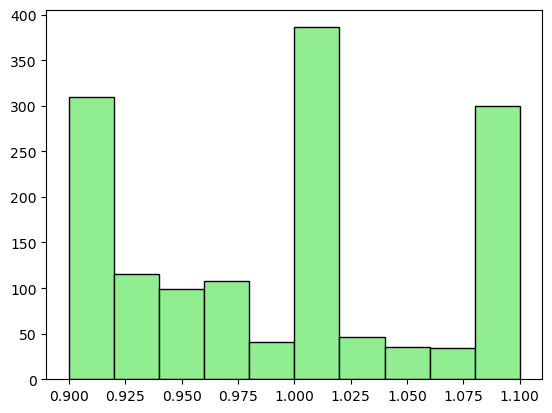

In [29]:
import matplotlib.pyplot as plt
plt.hist(Lote_102024_v26['var_otim_ofer_py'], color='lightgreen', ec='black', bins=10)

(array([377.,  74.,  61.,  53.,  24., 714.,  39.,  36.,  29.,  66.]),
 array([0.9 , 0.92, 0.94, 0.96, 0.98, 1.  , 1.02, 1.04, 1.06, 1.08, 1.1 ]),
 <BarContainer object of 10 artists>)

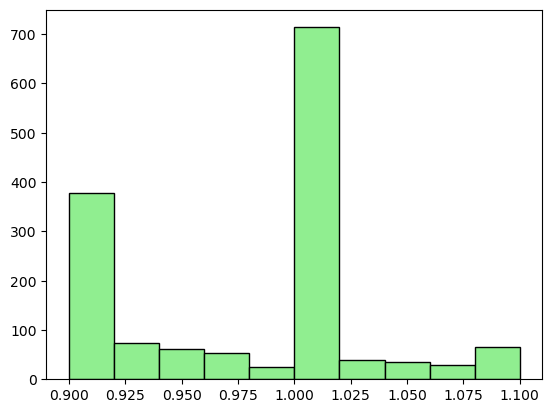

In [30]:
plt.hist(Lote_102024_v26['var_otim_ofer_earnix'], color='lightgreen', ec='black', bins=10)

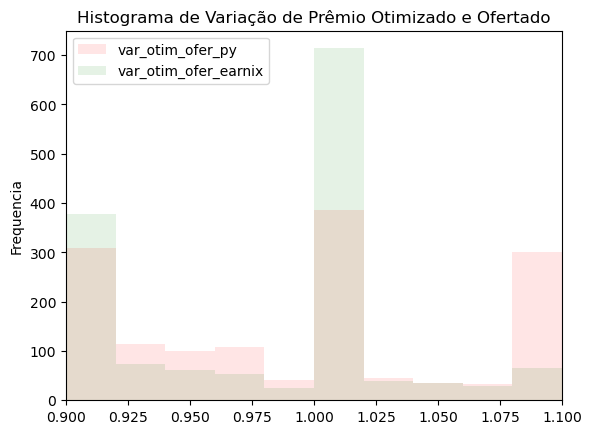

In [31]:
x1 = Lote_102024_v26['var_otim_ofer_py']
x2 = Lote_102024_v26['var_otim_ofer_earnix']

kwargs = dict(alpha=0.1, bins=10)

plt.hist(x1, **kwargs, color='r', label='var_otim_ofer_py')
plt.hist(x2, **kwargs, color='g', label='var_otim_ofer_earnix')
plt.gca().set(title='Histograma de Variação de Prêmio Otimizado e Ofertado', ylabel='Frequencia')
plt.xlim(0.9,1.1)
plt.legend();

## Exporting the Data frame.

In [66]:
Lote_102024_v26.to_csv(r'Lote_102024_v26_v2.csv', sep='|' ,header='true',index=False)

In [ ]:
analitico_202410_ajustado=Lote_102024_v1
analitico_202410_ajustado.to_csv(r'analitico_202410_ajustado_elaticidade2.csv', sep='|' ,header='true',index=False)

In [48]:
df_lote_otim2 = df_lote_otim.iloc[0:20,:]
df_lote_otim2.shape

(20, 192)

In [104]:
import pandas as pd
import numpy as np

def relatorio_otim2(df, groupby_vars=None):
    if groupby_vars is None:
        groupby_vars = []

    df["tarifa"] = df["premio"]
    df["per_com_pct"] = df['per_com'] / 100

    # Calcular somas e médias ponderadas
    df["premio_prob"] = df["retencao_otimizada"] * df["precos_otimizados"]
    df["premio_anterior_prob"] = df["retencao_otimizada"] * df["premio_anterior"]
    df["tarifa_prob"] = df["retencao_otimizada"] * df["tarifa"]
    df["Act_cost_prob"] = df["retencao_otimizada"] * df["Act_cost"]
    df["comissao_valor_prob"] = df["per_com_pct"] * df["premio_prob"]

    grouped_df = df.groupby(groupby_vars) if groupby_vars else [(None, df)]

    results = []
    for group_name, group in grouped_df:
        tarifa_w = np.sum(group["tarifa_prob"]) / np.sum(group["retencao_otimizada"])
        apolice_ofertada = np.round(group.shape[0], 0)
        apolice_estimada = np.round(np.sum(group["retencao_otimizada"]), 0)
        premio_ofertado = np.mean(group["precos_otimizados"])
        retencao_estimada = np.mean(group["retencao_otimizada"])
        premio_esperado = np.sum(group["premio_prob"]) / np.sum(group["retencao_otimizada"])
        risco_ofertado = np.mean(group["Act_cost"])
        risco_esperado = np.sum(group["Act_cost_prob"]) / np.sum(group["retencao_otimizada"])
        sp_ofertado = np.sum(group["Act_cost"]) / np.sum(group["precos_otimizados"])
        sp_esperado = np.sum(group["Act_cost_prob"]) / np.sum(group["premio_prob"])
        comis_ofertado = np.sum(group["per_com_pct"] * group["precos_otimizados"]) / np.sum(group["precos_otimizados"])
        comis_esperado = np.sum(group["comissao_valor_prob"]) / np.sum(group["premio_prob"])
        premio_anterior = np.mean(group["premio_anterior"])
        premio_anterior_w = np.sum(group["premio_anterior_prob"]) / np.sum(group["retencao_otimizada"])
        ic_ofertado = sp_ofertado + comis_ofertado + 0.2749
        ic_esperado = sp_esperado + comis_esperado + 0.2749

        result = [
            round(apolice_ofertada, 0),
            round(apolice_estimada, 0),
            round(retencao_estimada, 3),
            round(premio_ofertado, 2),
            round(premio_esperado, 2),
            round(premio_anterior, 2),
            round(premio_anterior_w, 2),
            round(risco_ofertado, 2),
            round(risco_esperado, 2),
            round(comis_ofertado, 2),
            round(comis_esperado, 2),
            round(sp_ofertado, 2),
            round(sp_esperado, 4),
            round(ic_ofertado, 4),
            round(ic_esperado, 4)
        ]

        if groupby_vars:
            result.extend([group_name] if isinstance(group_name, tuple) else [group_name])

        results.append(result)

    columns = [
        'Apolices Ofertadas:',
        'Apolices Renovadas:',
        '%Retenção:',
        'Premio Ofertado:',
        'Premio Renovado:',
        'Premio Anterior Ofertado:',
        'Premio Anterior Renovado:',
        'Risco Ofertado',
        'Risco Renovado',
        '%Comissão Ofertada:',
        '%Comissão Renovada:',
        '%SP Ofertada:',
        '%SP Renovada:',
        '%IC Ofertado:',
        '%IC Renovado:'
    ]

    if groupby_vars:
        columns.extend(groupby_vars)

    tabela = pd.DataFrame(results, columns=columns).T

    return tabela

# Exemplo de uso:
# df é o DataFrame contendo os dados
# groupby_vars é uma lista de colunas para agrupar (por exemplo, ['classe_bonus_bin'])
# result_table = relatorio_otim(df_lote_otim2, groupby_vars=['classe_bonus_bin'])

In [112]:
relatorio_otim2(df_lote_otim2, groupby_vars=['classe_bonus_bin'])

,Apolices Ofertadas:,Apolices Renovadas:,%Retenção:,Premio Ofertado:,Premio Renovado:,Premio Anterior Ofertado:,Premio Anterior Renovado:,Risco Ofertado,Risco Renovado,%Comissão Ofertada:,%Comissão Renovada:,%SP Ofertada:,%SP Renovada:,%IC Ofertado:,%IC Renovado:,classe_bonus_bin
0,1,0.0,0.014,21192.50,21192.50,11773.61,11773.61,16229.77,16229.77,0.10,0.10,0.77,0.7658,1.1407,1.1407,00
1,49,26.0,0.535,2661.44,2231.39,2986.70,2789.53,1636.07,1344.53,0.16,0.17,0.61,0.6026,1.0509,1.0452,Demais


In [267]:
def lower_bound_constraint(P):
    
    return np.where((df['elasticidade'] >= -3.2) & (df['elasticidade'] <= -2.99), df['premio'], P)

In [268]:
def upper_bound_constraint(P):
    return np.where((df['elasticidade'] >= -3.2) & (df['elasticidade'] <= -2.99), df['premio'], P) - P

In [289]:
#lower_bound_constraint(df_lote_otim2['precos_otimizados'])

In [224]:
df_lote_otim2 = df_lote_otim.iloc[0:50,:]
df_lote_otim2.shape


(50, 197)

In [33]:
import pandas as pd
import numpy as np

def relatorio(df, var_premio, var_retencao, groupby_vars=None):
    
    premio_otim = df[var_premio]
    retencao_otim = df[var_retencao]
    custo = df['Act_cost']
    premio_tarifa = df['tarifa']
    per_com_pct = df['per_com'] / 100
    
    if groupby_vars is None:
        groupby_vars = []

    grouped_df = df.groupby(groupby_vars) if groupby_vars else [(None, df)]

    results = []
    
    for group_name, group in grouped_df:
        tarifa_w = sum(premio_tarifa * retencao_otim) / sum(retencao_otim)
        apolice_ofertada = np.round(group.shape[0], 0)
        apolice_estimada = np.round(np.sum(group[var_retencao]), 0)
        premio_ofertado = np.mean(group[var_premio])
        retencao_estimada = np.mean(group[var_retencao])
        premio_esperado = sum(premio_otim * retencao_otim) / sum(retencao_otim)
        risco_ofertado = np.mean(group['Act_cost'])
        risco_esperado = sum(custo * retencao_otim) / sum(retencao_otim)
        sp_ofertado = risco_ofertado / premio_ofertado
        sp_esperado = risco_esperado / premio_esperado
        comis_valor_prob = sum(premio_otim * per_com_pct)
        premio_prob = sum(premio_otim * retencao_otim)
        comis_ofertado = sum(premio_otim * per_com_pct) / sum(premio_otim)
        comis_esperado = comis_valor_prob / premio_prob
        premio_anterior = np.mean(group['premio_anterior'])
        premio_anterior_w = sum(premio_anterior * retencao_otim) / sum(retencao_otim)
 
        ic_ofertado = sp_ofertado + comis_ofertado + 0.2749
        ic_esperado = sp_esperado + comis_esperado + 0.2749

        result = [
            apolice_ofertada, apolice_estimada, premio_ofertado, retencao_estimada,
            premio_esperado, risco_ofertado, risco_esperado, sp_ofertado, sp_esperado,
            comis_valor_prob, premio_prob, comis_ofertado, comis_esperado, premio_anterior,
            premio_anterior_w, ic_ofertado, ic_esperado
        ]

        if groupby_vars:
            result = [group_name] + result if isinstance(group_name, tuple) else [group_name] + result

        results.append(result)

    columns = [
        'apolice_ofertada', 'apolice_estimada', 'premio_ofertado', 'retencao_estimada',
        'premio_esperado', 'risco_ofertado', 'risco_esperado', 'sp_ofertado', 'sp_esperado',
        'comis_valor_prob', 'premio_prob', 'comis_ofertado', 'comis_esperado', 'premio_anterior',
        'premio_anterior_w', 'ic_ofertado', 'ic_esperado'
    ]

    if groupby_vars:
        columns = groupby_vars + columns

    tabela = pd.DataFrame(results, columns=columns)

    return tabela

In [36]:
#result_table = relatorio(Lote_102024_v26,"precos_otimizados","retencao_otimizada" ,groupby_vars=['elasticidade_bin'])
#result_table

In [224]:
import pandas as pd
import numpy as np

def relatorio_bivariado(df,groupby_vars,carregamento=27.49):
    
    df_grouped = df.groupby(groupby_vars).agg(
        apolice_ofertada=('chave', 'count'),
        apolice_estimada=('retencao_otimizada', 'sum'),
        premio_ofertado=('precos_otimizados', 'mean'),
        premio_ofertado_sum=('precos_otimizados', 'sum'),
        retencao_estimada=('retencao_otimizada', 'mean'), 
        premio_anterior_ofertado = ('premio_anterior', 'mean'), 
        risco_ofertado = ('Act_cost', 'mean'), 
        premio_esperado_sum = ('precos_otimizados', lambda x: (x * df.loc[x.index, 'retencao_otimizada']).sum()),
        premio_anterior_esperado_sum=('premio_anterior', lambda x: (x * df.loc[x.index, 'retencao_otimizada']).sum()),
        comis_valor_sum=('per_com_pct', lambda x: (x * df.loc[x.index, 'precos_otimizados']).sum()),
        comis_valor_esperada_sum=('per_com_pct', lambda x: (x * df.loc[x.index, 'precos_otimizados'] * df.loc[x.index, 'retencao_otimizada']).sum()),
        risco_esperado_sum=('Act_cost', lambda x: (x * df.loc[x.index, 'retencao_otimizada']).sum()),
        risco_sum=('Act_cost', 'sum'),
                        
    ).reset_index()
      
    df_grouped['premio_esperado'] = df_grouped["premio_esperado_sum"]/df_grouped["apolice_estimada"]
    df_grouped['premio_anterior_esperado'] = df_grouped["premio_anterior_esperado_sum"]/df_grouped["apolice_estimada"]
    df_grouped['risco_esperado'] = df_grouped["risco_esperado_sum"]/df_grouped["apolice_estimada"]
    df_grouped['%comis_ofertada'] = df_grouped["comis_valor_sum"]/df_grouped["premio_ofertado_sum"]
    df_grouped['%comis_esperada'] = df_grouped["comis_valor_esperada_sum"]/df_grouped["premio_esperado_sum"]
    df_grouped['%SP Ofertada'] = df_grouped["risco_sum"]/df_grouped["premio_ofertado_sum"]
    
    df_grouped['%SP Renovada'] = df_grouped["risco_esperado_sum"]/df_grouped["premio_esperado_sum"]
    
    df_grouped['retencao_estimada'] =df_grouped['retencao_estimada']*100
    df_grouped['%comis_ofertada'] =df_grouped['%comis_ofertada']*100
    df_grouped['%comis_esperada'] =df_grouped['%comis_esperada']*100
    df_grouped['%SP Ofertada'] =df_grouped['%SP Ofertada'] *100
    df_grouped['%SP Renovada'] = df_grouped['%SP Renovada'] *100
    
    df_grouped['%IC Ofertada'] =df_grouped['%SP Ofertada']+df_grouped['%comis_ofertada']+carregamento
    df_grouped['%IC Renovada'] = df_grouped['%SP Renovada']+df_grouped['%comis_esperada']+carregamento
    
    df_grouped.drop(['risco_sum','premio_ofertado_sum','comis_valor_sum','comis_valor_esperada_sum','risco_esperado_sum','premio_anterior_esperado_sum','premio_esperado_sum','premio_esperado_sum'], axis='columns', inplace=True)
    df_grouped=df_grouped.round(0)
    
    return df_grouped

   

In [228]:
relatorio_bivariado(Lote_102024_v26,groupby_vars = ['elasticidade_bin'])


,elasticidade_bin,apolice_ofertada,apolice_estimada,premio_ofertado,retencao_estimada,premio_anterior_ofertado,risco_ofertado,premio_esperado,premio_anterior_esperado,risco_esperado,%comis_ofertada,%comis_esperada,%SP Ofertada,%SP Renovada,%IC Ofertada,%IC Renovada
0,"(-3.6, -3.55]",8,0.0,5376.0,6.0,3219.0,3660.0,4929.0,2955.0,3344.0,14.0,14.0,68.0,68.0,110.0,110.0
1,"(-3.55, -3.5]",169,27.0,4980.0,16.0,3602.0,3056.0,4165.0,3314.0,2563.0,17.0,16.0,61.0,62.0,105.0,105.0
2,"(-3.5, -3.45]",216,59.0,4234.0,27.0,3447.0,2621.0,3426.0,3155.0,2095.0,16.0,16.0,62.0,61.0,105.0,105.0
3,"(-3.45, -3.4]",169,73.0,3254.0,43.0,3126.0,1997.0,2974.0,3059.0,1810.0,16.0,16.0,61.0,61.0,104.0,104.0
4,"(-3.4, -3.35]",174,89.0,2940.0,51.0,3147.0,1733.0,2734.0,3095.0,1608.0,16.0,16.0,59.0,59.0,103.0,102.0
5,"(-3.35, -3.3]",141,80.0,2676.0,57.0,3022.0,1521.0,2569.0,2952.0,1455.0,15.0,15.0,57.0,57.0,99.0,99.0
6,"(-3.3, -3.25]",79,47.0,2556.0,60.0,2857.0,1386.0,2508.0,2823.0,1358.0,16.0,16.0,54.0,54.0,98.0,98.0
7,"(-3.25, -3.2]",78,49.0,2372.0,62.0,2702.0,1261.0,2338.0,2662.0,1243.0,15.0,16.0,53.0,53.0,96.0,96.0
8,"(-3.2, -3.15]",69,49.0,2160.0,70.0,2559.0,1190.0,2155.0,2562.0,1188.0,16.0,16.0,55.0,55.0,99.0,99.0
9,"(-3.15, -3.1]",57,42.0,2264.0,73.0,2810.0,1261.0,2270.0,2822.0,1265.0,15.0,15.0,56.0,56.0,98.0,98.0


In [216]:
import pandas as pd
import numpy as np
corrigir
def relatorio_univariado(df):
     
    df_grouped = df.agg(
        apolice_ofertada=('chave', 'count'),
        apolice_estimada=('retencao_otimizada', 'sum'),
        premio_ofertado=('precos_otimizados', 'mean'),
        premio_ofertado_sum=('precos_otimizados', 'sum'),
        retencao_estimada=('retencao_otimizada', 'mean'), 
        premio_anterior_ofertado = ('premio_anterior', 'mean'), 
        risco_ofertado = ('Act_cost', 'mean'), 
        premio_esperado_sum = ('precos_otimizados', lambda x: (x * df.loc[x.index, 'retencao_otimizada']).sum()),
        premio_anterior_esperado_sum=('premio_anterior', lambda x: (x * df.loc[x.index, 'retencao_otimizada']).sum()),
        comis_valor_sum=('per_com_pct', lambda x: (x * df.loc[x.index, 'precos_otimizados']).sum()),
        comis_valor_esperada_sum=('per_com_pct', lambda x: (x * df.loc[x.index, 'precos_otimizados'] * df.loc[x.index, 'retencao_otimizada']).sum()),
        risco_esperado_sum=('Act_cost', lambda x: (x * df.loc[x.index, 'retencao_otimizada']).sum()),
        risco_sum=('Act_cost', 'sum'),
                        
    ).reset_index()

      
    df_grouped['premio_esperado'] = df_grouped["premio_esperado_sum"]/df_grouped["apolice_estimada"]
    df_grouped['premio_anterior_esperado'] = df_grouped["premio_anterior_esperado_sum"]/df_grouped["apolice_estimada"]
    df_grouped['risco_esperado'] = df_grouped["risco_esperado_sum"]/df_grouped["apolice_estimada"]
    df_grouped['%comis_ofertada'] = df_grouped["comis_valor_sum"]/df_grouped["premio_ofertado_sum"]
    df_grouped['%comis_esperada'] = df_grouped["comis_valor_esperada_sum"]/df_grouped["premio_esperado_sum"]
    df_grouped['%SP Ofertada'] = df_grouped["risco_sum"]/df_grouped["premio_ofertado_sum"]
    
    df_grouped['%SP Renovada'] = df_grouped["risco_esperado_sum"]/df_grouped["premio_esperado_sum"]
    
    df_grouped['retencao_estimada'] =df_grouped['retencao_estimada']*100
    df_grouped['%comis_ofertada'] =df_grouped['%comis_ofertada']*100
    df_grouped['%comis_esperada'] =df_grouped['%comis_esperada']*100
    df_grouped['%SP Ofertada'] =df_grouped['%SP Ofertada'] *100
    df_grouped['%SP Renovada'] = df_grouped['%SP Renovada'] *100
    
    df_grouped['%IC Ofertada'] =df_grouped['%SP Ofertada']+df_grouped['%comis_ofertada']+27.49
    df_grouped['%IC Renovada'] = df_grouped['%SP Renovada']+df_grouped['%comis_esperada']+27.49
    
    df_grouped.drop(['risco_sum','premio_ofertado_sum','comis_valor_sum','comis_valor_esperada_sum','risco_esperado_sum','premio_anterior_esperado_sum','premio_esperado_sum','premio_esperado_sum'], axis='columns', inplace=True)

      
    df_grouped=df_grouped.round(0)
    
    return df_grouped


In [217]:
relatorio_univariado(Lote_102024_v26).T

ValueError: cannot reindex on an axis with duplicate labels

In [218]:
def relatorio_univariado(df):
    df_grouped = df.agg(
        apolice_ofertada=('chave', 'count'),
        apolice_estimada=('retencao_otimizada', 'sum'),
        premio_ofertado=('precos_otimizados', 'mean'),
        premio_ofertado_sum=('precos_otimizados', 'sum'),
        retencao_estimada=('retencao_otimizada', 'mean'),
        premio_anterior_ofertado=('premio_anterior', 'mean'),
        risco_ofertado=('Act_cost', 'mean'),
        premio_esperado_sum=('precos_otimizados', lambda x: (x * df.loc[x.index, 'retencao_otimizada']).sum()),
        premio_anterior_esperado_sum=('premio_anterior', lambda x: (x * df.loc[x.index, 'retencao_otimizada']).sum()),
        comis_valor_sum=('per_com_pct', lambda x: (x * df.loc[x.index, 'precos_otimizados']).sum()),
        comis_valor_esperada_sum=('per_com_pct', lambda x: (x * df.loc[x.index, 'precos_otimizados'] * df.loc[x.index, 'retencao_otimizada']).sum()),
        risco_esperado_sum=('Act_cost', lambda x: (x * df.loc[x.index, 'retencao_otimizada']).sum()),
        risco_sum=('Act_cost', 'sum'),
    ).reset_index()

    df_grouped['premio_esperado'] = df_grouped["premio_esperado_sum"] / df_grouped["apolice_estimada"]
    df_grouped['premio_anterior_esperado'] = df_grouped["premio_anterior_esperado_sum"] / df_grouped["apolice_estimada"]
    df_grouped['risco_esperado'] = df_grouped["risco_esperado_sum"] / df_grouped["apolice_estimada"]
    df_grouped['%comis_ofertada'] = df_grouped["comis_valor_sum"] / df_grouped["premio_ofertado_sum"]
    df_grouped['%comis_esperada'] = df_grouped["comis_valor_esperada_sum"] / df_grouped["premio_esperado_sum"]
    df_grouped['%SP Ofertada'] = df_grouped["risco_sum"] / df_grouped["premio_ofertado_sum"]
    df_grouped['%SP Renovada'] = df_grouped["risco_esperado_sum"] / df_grouped["premio_esperado_sum"]

    df_grouped['retencao_estimada'] = df_grouped['retencao_estimada'] * 100
    df_grouped['%comis_ofertada'] = df_grouped['%comis_ofertada'] * 100
    df_grouped['%comis_esperada'] = df_grouped['%comis_esperada'] * 100
    df_grouped['%SP Ofertada'] = df_grouped['%SP Ofertada'] * 100
    df_grouped['%SP Renovada'] = df_grouped['%SP Renovada'] * 100

    df_grouped['%IC Ofertada'] = df_grouped['%SP Ofertada'] + df_grouped['%comis_ofertada'] + 27.49
    df_grouped['%IC Renovada'] = df_grouped['%SP Renovada'] + df_grouped['%comis_esperada'] + 27.49

    df_grouped.drop(['risco_sum', 'premio_ofertado_sum', 'comis_valor_sum', 'comis_valor_esperada_sum', 'risco_esperado_sum', 'premio_anterior_esperado_sum', 'premio_esperado_sum'], axis='columns', inplace=True)

    df_grouped = df_grouped.round(0)

    return df_grouped

In [219]:
relatorio_univariado(Lote_102024_v26).T

ValueError: cannot reindex on an axis with duplicate labels